In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [26]:
boston_df['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [29]:
boston_df[['MEDV', 'CHAS']].groupby(['CHAS']).median()

,MEDV
CHAS,
0.0,20.9
1.0,23.3


In [32]:
x1 = boston_df[boston_df['CHAS']==0.0]['MEDV']
x2 = boston_df[boston_df['CHAS']==1.0]['MEDV']

In [9]:
# boston_df.groupby(pd.cut(boston_df['AGE'], [0, 35, 70, boston_df['AGE'].max()])).reset_index()

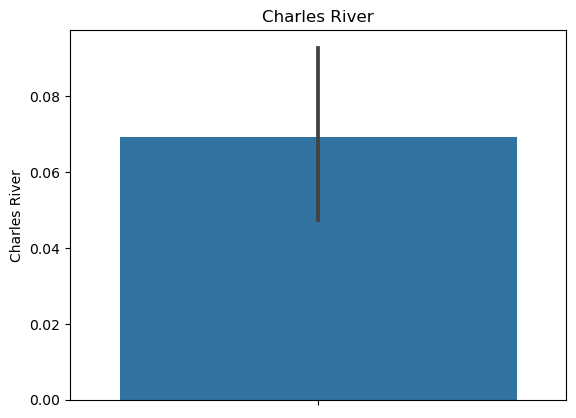

In [25]:
sns.barplot(y="CHAS", data=boston_df).set(title="Charles River", ylabel="Charles River");

[Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Median value of owner-occupied homes')]

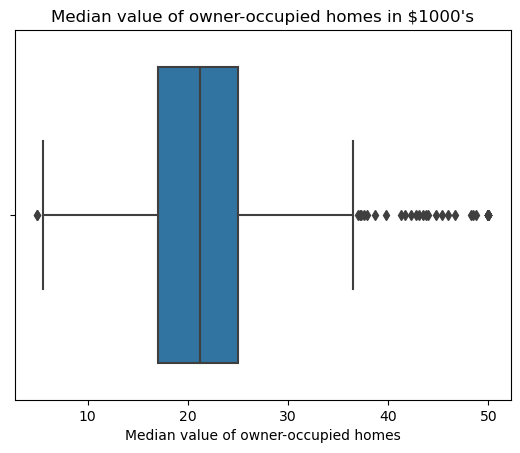

In [23]:
sns.boxplot(x="MEDV", data=boston_df).set(title="Median value of owner-occupied homes in $1000's", xlabel="Median value of owner-occupied homes")

[Text(0.5, 1.0, 'MEDV vs AGE'),
 Text(0.5, 0, "Median value of owner-occupied homes in $1000's"),
 Text(0, 0.5, 'proportion of owner-occupied units built prior to 1940')]

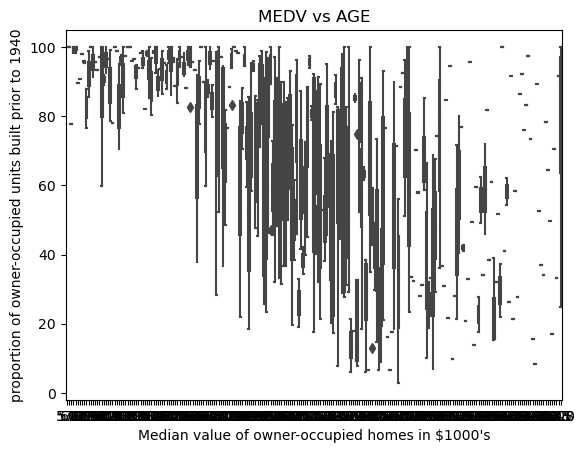

In [24]:
sns.boxplot(x="MEDV", y="AGE", data=boston_df).set(title="MEDV vs AGE", xlabel="Median value of owner-occupied homes in $1000's", ylabel="proportion of owner-occupied units built prior to 1940")

[Text(0.5, 1.0, 'NO Concentration vs Non-retail business acres'),
 Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Proportion of non-retail business acres per town')]

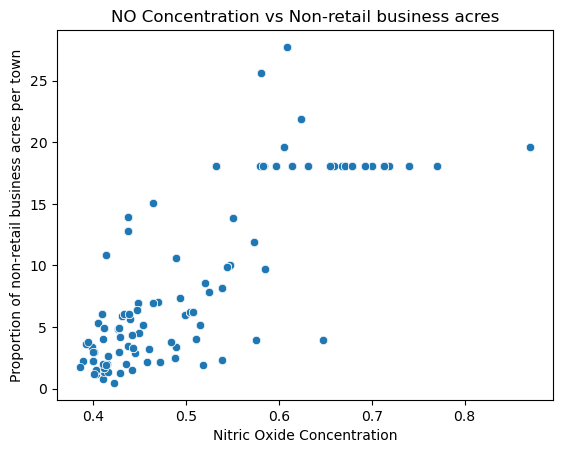

In [20]:
sns.scatterplot(data=boston_df, x="NOX", y="INDUS").set(title="NO Concentration vs Non-retail business acres", xlabel="Nitric Oxide Concentration", ylabel="Proportion of non-retail business acres per town")

[Text(0.5, 1.0, 'Pupil to Teacher Ratio'),
 Text(0.5, 0, 'Pupil To Teacher Ratio by Town')]

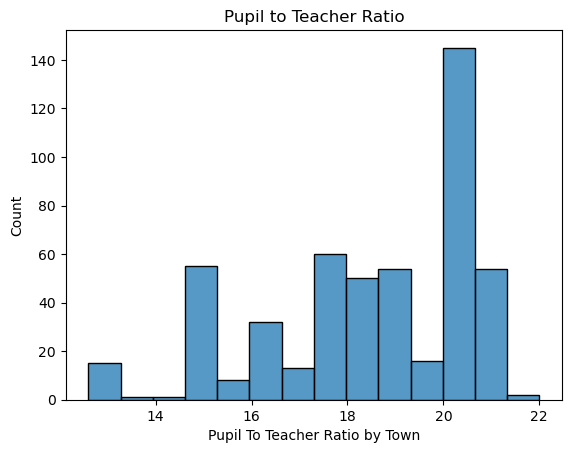

In [18]:
sns.histplot(data=boston_df, x="PTRATIO").set(title="Pupil to Teacher Ratio", xlabel="Pupil To Teacher Ratio by Town")

In [35]:
stats.ttest_ind(x1, x2)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Null Hypothesis: There is no difference in group means for houses bounded by the Charles River and houses not
Alt Hypthosis: There is a difference in group mean for houses bounded by the Charles River and houses not

alpha = 0.05
At a p value of p=0.0000739 which is less than the alpha level of 0.05, we reject the null hypothesis. There is strong evidence to show that there is a signficant difference between the 2 median house values.

In [41]:
from scipy.stats import f_oneway

p1 = boston_df[boston_df['AGE']<83]['MEDV']
p2 = boston_df[boston_df['AGE']>=83]['MEDV']

f_oneway(p1, p2)

F_onewayResult(statistic=65.51513325324017, pvalue=4.354004757227418e-15)

In [43]:
from scipy.stats import pearsonr

l1 = boston_df['NOX']
l2 = boston_df['INDUS']

pearsonr(l1, l2)
# corr, _ = 
# print('Pearsons correlation: %.3f' % corr)

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

In [46]:
import statsmodels.api as sm
#

x = boston_df['DIS']
y = boston_df['MEDV']

x_mat = sm.add_constant(x)  # Add a constant column - not optional!
lm_model = sm.OLS(y, x_mat) # Create the OLS regression object
lm_fit = lm_model.fit()     # Estimate the parameters
print(lm_fit.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        15:33:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0